In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import src.feature as f

In [24]:
template=cv2.imread('./data/multiple_items/answer.jpg')
image=cv2.imread("./data/multiple_items/all.jpg")

template_feature_full=f.extract_template_feature(template)
template_feature,offset,response_index=f.make_one_template(template_feature_full)

image_feature=f.extract_image_feature(image)
response_map=f.compute_response_map(image_feature)
sim=f.compute_feature_similarity(response_map,template_feature,offset,response_index)
x,y=f.decode_match_location(sim,0.7)

In [25]:
x,y

(array([368, 376], dtype=int64), array([248, 248], dtype=int64))

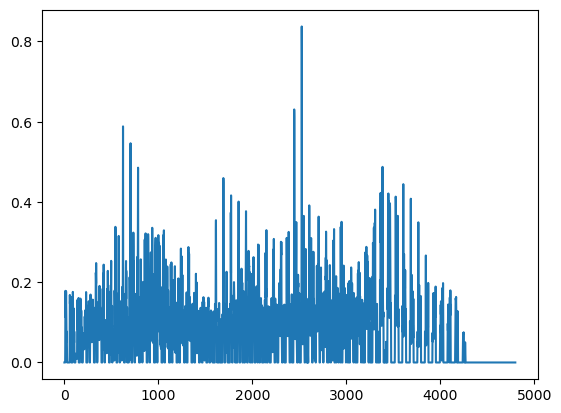

In [26]:
plt.plot(sim)

In [27]:
x[0],y[0]

(368, 248)

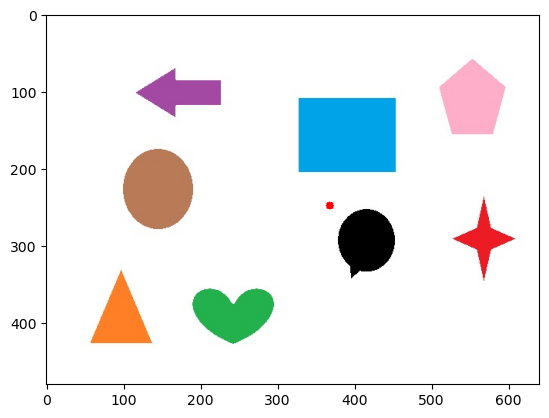

In [28]:
plt.imshow(cv2.circle(image.copy(),(x[0],y[0]),5,(0,0,255),-1)[:,:,::-1])

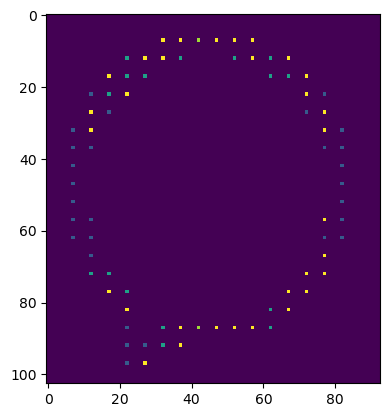

In [29]:
plt.imshow(f.make_one_template(template_feature_full,True))